# Adidas Sales Exploratory Data Analysis

**Date:** July 28, 2024

**By** Muhammad Hassan Saboor

Data Analyst | ML & Deep Learning Enthusiast

*Student of Masters in Data Science @ FAST NUCES (LAHORE)*



# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
import plotly.graph_objects as go
import warnings

#### Basic Important Settings

In [2]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [3]:
pd.options.display.float_format = '{:,.0f}'.format

In [4]:
warnings.filterwarnings("ignore")

# Loading Dataset

In [5]:
df = pd.read_excel('/kaggle/input/adidas-sales-dataset/Adidas US Sales Datasets.xlsx')

### Checking Top Rows of Data

In [6]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,Adidas Sales Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,NaN,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0,In-store


# Data Cleaning

In [7]:
df = df.drop([0,1,2])

In [8]:
df.drop(columns = "Unnamed: 0",inplace =True)

In [9]:
df.columns = df.iloc[0,:]

In [10]:
df["Operating Margin"] = df["Operating Margin"] * 100

#### Converting Date into Days , Months , Years

In [11]:
df = df[pd.to_datetime(df['Invoice Date'], errors='coerce').notna()]

df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])
df['Day'] = df['Invoice Date'].dt.day
df['Month'] = df['Invoice Date'].dt.month
df['Year'] = df['Invoice Date'].dt.year

In [12]:
df.head()

3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Day,Month,Year
4,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,50,In-store,1,1,2020
5,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,30,In-store,2,1,2020
6,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,35,In-store,3,1,2020
7,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,35,In-store,4,1,2020
8,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,30,In-store,5,1,2020


# Exploratory Data Analysis

## Transactions Details

List of Retailers

In [14]:
List_Of_Retailers = df["Retailer"].unique()
print(f"The list of Retailers are {List_Of_Retailers}")

The list of Retailers are ['Foot Locker' 'Walmart' 'Sports Direct' 'West Gear' "Kohl's" 'Amazon']


Total Transactions of Retailers

In [15]:
Total_Transactions_Of_Retailers = df["Retailer"].value_counts()
print(f"Total Transactions Performed by Retailers are \n{Total_Transactions_Of_Retailers}")

Total Transactions Performed by Retailers are 
Retailer
Foot Locker      2637
West Gear        2374
Sports Direct    2032
Kohl's           1030
Amazon            949
Walmart           626
Name: count, dtype: int64


In [16]:
fig = go.Figure(data=[go.Pie(labels=Total_Transactions_Of_Retailers.index, values=Total_Transactions_Of_Retailers, hole=.3)])

# Update layout for 3D effect
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)),
                  textinfo='label+percent',
                  pull=[0.1, 0, 0, 0])  # Pull the first slice for emphasis

fig.update_layout(title_text='Total Transactions Performed by Retailers',
                  annotations=[dict(text='Retailers', x=0.5, y=0.5, font_size=20, showarrow=False)])

# Show the figure
fig.show()

List of Products

In [17]:
List_of_Products = df["Product"].unique()
print(f"The total no of Products are {List_of_Products}")

The total no of Products are ["Men's Street Footwear" "Men's Athletic Footwear"
 "Women's Street Footwear" "Women's Athletic Footwear" "Men's Apparel"
 "Women's Apparel"]


Total Transactions of Products

In [18]:
Total_Transactions_In_Products = df["Product"].value_counts()
print(f"Total_Transavtions in Products are \n{Total_Transactions_In_Products}")

Total_Transavtions in Products are 
Product
Men's Street Footwear        1610
Men's Athletic Footwear      1610
Women's Street Footwear      1608
Women's Apparel              1608
Women's Athletic Footwear    1606
Men's Apparel                1606
Name: count, dtype: int64


In [19]:
fig = go.Figure(data=[go.Pie(labels=Total_Transactions_In_Products.index, values=Total_Transactions_In_Products, hole=.3)])

# Update layout for 3D effect and figure size
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)),
                  textinfo='label+percent',
                  pull=[0.1, 0, 0, 0])  # Pull the first slice for emphasis

fig.update_layout(
    title_text='Total Transactions Performed by Products',
    annotations=[dict(text='Products', x=0.5, y=0.5, font_size=20, showarrow=False)],

)

# Show the figure
fig.show()

List of Regions

In [20]:
List_Of_Regions = df["Region"].unique()
print(f"The total no of Region are {List_Of_Regions}")

The total no of Region are ['Northeast' 'South' 'West' 'Midwest' 'Southeast']


Total Transactions in Regions

In [21]:
Total_Transactions_In_Regions = df["Region"].value_counts()
print(f"Total_Transavtions in Regions are \n{Total_Transactions_In_Regions}")

Total_Transavtions in Regions are 
Region
West         2448
Northeast    2376
Midwest      1872
South        1728
Southeast    1224
Name: count, dtype: int64


In [22]:
fig = go.Figure(data=[go.Pie(labels=Total_Transactions_In_Regions.index, values=Total_Transactions_In_Regions, hole=.3)])

# Update layout for 3D effect and figure size
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)),
                  textinfo='label+percent',
                  pull=[0.1, 0, 0, 0])  # Pull the first slice for emphasis

fig.update_layout(
    title_text='Total Transactions Performed by Regions',
    annotations=[dict(text='Regions', x=0.5, y=0.5, font_size=20, showarrow=False)])

# Show the figure
fig.show()

List of Sales Methods

In [23]:
List_Of_Sales_Methods = df["Sales Method"].unique()
print(f"The total Sales Methods are {List_Of_Sales_Methods}")

The total Sales Methods are ['In-store' 'Outlet' 'Online']


Total Transactions for each Sales Method

In [24]:
Total_Transactions_for_each_Sales_Method = df["Sales Method"].value_counts()
print(f"Total_Transavtions for each Sales Method are \n{Total_Transactions_for_each_Sales_Method}")

Total_Transavtions for each Sales Method are 
Sales Method
Online      4889
Outlet      3019
In-store    1740
Name: count, dtype: int64


In [25]:
fig = go.Figure(data=[go.Pie(labels=Total_Transactions_for_each_Sales_Method.index, values=Total_Transactions_for_each_Sales_Method, hole=.3)])

# Update layout for 3D effect and figure size
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)),
                  textinfo='label+percent',
                  pull=[0.1, 0, 0, 0])  # Pull the first slice for emphasis

fig.update_layout(
    title_text='Total Transactions Performed by Sales Methods',
    annotations=[dict(text='Sales Methods', x=0.5, y=0.5, font_size=20, showarrow=False)]
)

# Show the figure
fig.show()

List of Cities

In [26]:
List_Of_Cities = df["City"].unique()
print(f"The list of Cities are {List_Of_Cities}")

The list of Cities are ['New York' 'Houston' 'San Francisco' 'Los Angeles' 'Chicago' 'Dallas'
 'Philadelphia' 'Las Vegas' 'Denver' 'Seattle' 'Miami' 'Minneapolis'
 'Billings' 'Knoxville' 'Omaha' 'Birmingham' 'Portland' 'Anchorage'
 'Honolulu' 'Orlando' 'Albany' 'Cheyenne' 'Richmond' 'Detroit' 'St. Louis'
 'Salt Lake City' 'New Orleans' 'Boise' 'Phoenix' 'Albuquerque' 'Atlanta'
 'Charleston' 'Charlotte' 'Columbus' 'Louisville' 'Jackson' 'Little Rock'
 'Oklahoma City' 'Wichita' 'Sioux Falls' 'Fargo' 'Des Moines' 'Milwaukee'
 'Indianapolis' 'Baltimore' 'Wilmington' 'Newark' 'Hartford' 'Providence'
 'Boston' 'Burlington' 'Manchester']


Total Transactions in Cities

In [27]:
Total_Transactions_In_Cities = df["City"].value_counts()
print(f"Total_Transavtions in Cities are \n{Total_Transactions_In_Cities}")

Total_Transavtions in Cities are 
City
Portland          360
Charleston        288
Orlando           216
Salt Lake City    216
Houston           216
Boise             216
Phoenix           216
Albuquerque       216
Atlanta           216
New York          216
Jackson           216
Little Rock       216
Oklahoma City     216
Hartford          216
Providence        216
Boston            216
Burlington        216
Richmond          216
New Orleans       216
Manchester        216
Dallas            216
Philadelphia      216
Knoxville         216
Birmingham        216
Las Vegas         216
Los Angeles       216
San Francisco     216
Chicago           144
Newark            144
Baltimore         144
Indianapolis      144
Milwaukee         144
Des Moines        144
Fargo             144
Sioux Falls       144
Wichita           144
Wilmington        144
Honolulu          144
Albany            144
Louisville        144
Columbus          144
Charlotte         144
Seattle           144
Miami          

In [28]:
df_transactions = Total_Transactions_In_Cities.reset_index()
df_transactions.columns = ['City', 'Total Transactions']

# Create a 3D-like bar chart
fig = go.Figure(data=[
    go.Bar(x=df_transactions['City'], y=df_transactions['Total Transactions'],
           marker=dict(color='rgba(58, 71, 80, 0.6)',
                       line=dict(color='rgba(58, 71, 80, 1.0)', width=2)))
])

# Update layout for larger figure size and rotated x-axis labels
fig.update_layout(
    title='Total Transactions Performed by Cities',
    width=1200,  # Set the width of the figure
    height=600,  # Set the height of the figure
    xaxis=dict(tickangle=-90),  # Rotate x-axis labels
)

# Show the figure
fig.show()

List of States

In [29]:
List_Of_States = df["State"].unique()
print(f"The list of States are {List_Of_States}")

The list of States are ['New York' 'Texas' 'California' 'Illinois' 'Pennsylvania' 'Nevada'
 'Colorado' 'Washington' 'Florida' 'Minnesota' 'Montana' 'Tennessee'
 'Nebraska' 'Alabama' 'Maine' 'Alaska' 'Hawaii' 'Wyoming' 'Virginia'
 'Michigan' 'Missouri' 'Utah' 'Oregon' 'Louisiana' 'Idaho' 'Arizona'
 'New Mexico' 'Georgia' 'South Carolina' 'North Carolina' 'Ohio'
 'Kentucky' 'Mississippi' 'Arkansas' 'Oklahoma' 'Kansas' 'South Dakota'
 'North Dakota' 'Iowa' 'Wisconsin' 'Indiana' 'West Virginia' 'Maryland'
 'Delaware' 'New Jersey' 'Connecticut' 'Rhode Island' 'Massachusetts'
 'Vermont' 'New Hampshire']


Total Transactions in States

In [30]:
Total_Transactions_In_States = df["State"].value_counts()
print(f"Total_Transavtions in States are \n{Total_Transactions_In_States}")

Total_Transavtions in States are 
State
California        432
Texas             432
New York          360
Florida           360
Mississippi       216
Oregon            216
Louisiana         216
Idaho             216
New Mexico        216
Georgia           216
Arkansas          216
Virginia          216
Oklahoma          216
Connecticut       216
Rhode Island      216
Massachusetts     216
Vermont           216
Utah              216
Arizona           216
New Hampshire     216
Pennsylvania      216
Nevada            216
Alabama           216
Tennessee         216
South Dakota      144
Illinois          144
Colorado          144
New Jersey        144
Delaware          144
Maryland          144
West Virginia     144
Indiana           144
Wisconsin         144
Iowa              144
North Dakota      144
Michigan          144
Kansas            144
Missouri          144
Minnesota         144
Montana           144
Kentucky          144
Ohio              144
North Carolina    144
South Carolina

In [31]:
df_transactions_states = Total_Transactions_In_States.reset_index()
df_transactions_states.columns = ['State', 'Total Transactions']

# Create a 3D-like bar chart
fig = go.Figure(data=[
    go.Bar(x=df_transactions_states['State'], y=df_transactions_states['Total Transactions'],
           marker=dict(color='rgba(58, 71, 80, 0.6)',
                       line=dict(color='rgba(58, 71, 80, 1.0)', width=2)))
])

# Update layout for larger figure size and rotated x-axis labels
fig.update_layout(
    title='Total Transactions Performed by States',
    width=1200,  # Set the width of the figure
    height=600,  # Set the height of the figure
    xaxis=dict(tickangle=-90),  # Rotate x-axis labels
)

# Show the figure
fig.show()

Total Transactions in Years

In [32]:
Total_Transactions_In_Years = df["Year"].value_counts()
print(f"Total_Transavtions in Years are \n{Total_Transactions_In_Years}")

Total_Transavtions in Years are 
Year
2021    8346
2020    1302
Name: count, dtype: int64


In [33]:
df_transactions_years = Total_Transactions_In_Years.reset_index()
df_transactions_years.columns = ['Year', 'Total Transactions']

# Create a 3D-like bar chart
fig = go.Figure(data=[
    go.Bar(x=df_transactions_years['Year'], y=df_transactions_years['Total Transactions'],
           marker=dict(color='red',
                       line=dict(color='rgba(58, 71, 80, 1.0)', width=2)),
           width=0.4)  # Set the width of the bars
])

# Update layout for larger figure size and rotated x-axis labels
fig.update_layout(
    title='Total Transactions Performed by Years',
    width=1200,  # Set the width of the figure
    height=600,  # Set the height of the figure
    xaxis=dict(tickangle=-90),  # Rotate x-axis labels
)

# Show the figure
fig.show()

Total Transactions in Months

In [34]:
Total_Transactions_In_Months = df["Month"].value_counts()
print(f"Total_Transavtions in Years are \n{Total_Transactions_In_Months}")

Total_Transavtions in Years are 
Month
1     861
8     853
4     841
9     824
5     820
10    814
3     802
11    795
2     776
7     774
12    759
6     729
Name: count, dtype: int64


In [35]:
df_transactions_months = Total_Transactions_In_Months.reset_index()
df_transactions_months.columns = ['Month', 'Total Transactions']

# Sort the months if they are in a non-chronological order
df_transactions_months = df_transactions_months.sort_values(by='Month')

# Create a 3D-like line chart
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_transactions_months['Month'],
    y=df_transactions_months['Total Transactions'],
    mode='lines+markers',
    marker=dict(size=10, symbol='circle', color='green'),
    line=dict(color='rgba(58, 71, 80, 0.6)', width=2),
    name='Total Transactions'
))

# Update layout for larger figure size and rotated x-axis labels
fig.update_layout(
    title='Total Transactions Performed by Months',
    width=1200,  # Set the width of the figure
    height=600,  # Set the height of the figure
    xaxis=dict(title='Month', tickangle=-90),  # Rotate x-axis labels
    yaxis=dict(title='Total Transactions'),
)

# Show the figure
fig.show()

## Sales Details

Total Sales by Retailers

In [36]:
df.groupby("Retailer")[["Total Sales"]].agg(["sum","mean","count","min","max"])

3             Total Sales                           
                      sum    mean count  min     max
Retailer                                            
Amazon         77,698,912  81,875   949  416 618,750
Foot Locker   220,094,720  83,464  2637    0 765,000
Kohl's        102,114,753  99,141  1030  520 520,000
Sports Direct 182,470,997  89,799  2032  528 698,750
Walmart        74,558,410 119,103   626  880 825,000
West Gear     242,964,333 102,344  2374  203 825,000

Total Sales by All Products

In [37]:
df.groupby("Product")[["Total Sales"]].agg(["sum","mean","count","min","max"])

3                         Total Sales                            
                                  sum    mean count   min     max
Product                                                          
Men's Apparel             123,728,632  77,041  1606   252 617,500
Men's Athletic Footwear   153,673,680  95,449  1610   736 712,500
Men's Street Footwear     208,826,244 129,706  1610  1568 810,000
Women's Apparel           179,038,860 111,343  1608   910 825,000
Women's Athletic Footwear 106,631,896  66,396  1606     0 540,000
Women's Street Footwear   128,002,813  79,604  1608   369 665,000

Total Sales by Regions

In [38]:
df.groupby("Region")[["Total Sales"]].agg(["sum","mean","count","min","max"])

3         Total Sales                           
                  sum    mean count  min     max
Region                                          
Midwest   135,800,459  72,543  1872    0 618,750
Northeast 186,324,067  78,419  2376  160 780,000
South     144,663,181  83,717  1728  506 825,000
Southeast 163,171,236 133,310  1224  754 825,000
West      269,943,182 110,271  2448  735 735,000

Total Sales for each Sales Method

In [39]:
df.groupby("Sales Method")[["Total Sales"]].agg(["sum","mean","count","min","max"])

3            Total Sales                            
                     sum    mean count   min     max
Sales Method                                        
In-store     356,643,750 204,968  1740  7500 825,000
Online       247,672,882  50,659  4889     0 825,000
Outlet       295,585,493  97,908  3019     0 780,000

Total Sales by Cities

In [40]:
df.groupby("City")[["Total Sales"]].agg(["sum","mean","count","min","max"]).T

City                  Albany Albuquerque  Anchorage    Atlanta Baltimore  \
3                                                                          
Total Sales sum   24,427,804  19,865,016 14,753,103 18,997,466 7,758,059   
            mean     169,638      91,968    102,452     87,951    53,875   
            count        144         216        144        216       144   
            min         4134        2108       1764       1845       203   
            max      617,500     455,000    450,000    430,000   270,000   

City                Billings Birmingham      Boise     Boston Burlington  \
3                                                                          
Total Sales sum   15,710,886 17,633,424 19,276,878 11,076,810 14,352,923   
            mean     109,103     81,636     89,245     51,282     66,449   
            count        144        216        216        216        216   
            min         2464        750       2320        897       1170   
            max      360,000    525,000    520,000    373,750    420,000   

City              Charleston  Charlotte   Cheyenne   Chicago   Columbus  \
3                                                                         
Total Sales sum   39,974,797 23,956,531 18,577,517 9,797,488 18,484,583   
            mean     138,801    166,365    129,011    68,038    128,365   
            count        288        144        144       144        144   
            min          560       2880       1890       779       1428   
            max      752,500    682,500    440,000   300,000    618,750   

City                  Dallas     Denver Des Moines    Detroit     Fargo  \
3                                                                         
Total Sales sum   20,902,864 20,996,536  7,424,011 18,625,433 7,735,580   
            mean      96,773    145,809     51,556    129,343    53,719   
            count        216        144        144        144       144   
            min          644       2184        392       1848       528   
            max      542,500    531,250    315,000    540,000   300,000   

City                Hartford   Honolulu    Houston Indianapolis    Jackson  \
3                                                                            
Total Sales sum   11,573,448 22,282,457 25,456,882    8,836,198 15,591,709   
            mean      53,581    154,739    117,856       61,362     72,184   
            count        216        144        216          144        216   
            min          576       1786       4480          589       1275   
            max      373,750    650,000    500,000      360,000    542,500   

City               Knoxville  Las Vegas Little Rock Los Angeles Louisville  \
3                                                                            
Total Sales sum   18,067,440 20,858,509  12,639,347  25,634,913 10,072,848   
            mean      83,646     96,567      58,515     118,680     69,950   
            count        216        216         216         216        144   
            min          506       2392         880        1107        972   
            max      487,500    480,000     490,000     520,000    341,250   

City              Manchester      Miami Milwaukee Minneapolis New Orleans  \
3                                                                           
Total Sales sum   16,411,667 31,600,863 7,727,469   7,378,068  23,750,781   
            mean      75,980    219,450    53,663      51,237     109,957   
            count        216        144       144         144         216   
            min         1485        754       280         224        1749   
            max      468,750    747,500   330,000     275,000     825,000   

City                New York    Newark Oklahoma City     Omaha    Orlando  \
3                                                                           
Total Sales sum   39,801,235 9,934,246    10,620,734 5,929,038 27,682,851   
            mean 

Total Sales by States

In [41]:
df.groupby("State")[["Total Sales"]].agg(["sum","mean","count","min","max"]).T

State                Alabama     Alaska    Arizona   Arkansas California  \
3                                                                          
Total Sales sum   17,633,424 14,753,103 15,782,221 12,639,347 60,174,133   
            mean      81,636    102,452     73,066     58,515    139,292   
            count        216        144        216        216        432   
            min          750       1764       1599        880       1107   
            max      525,000    450,000    367,500    490,000    700,000   

State               Colorado Connecticut   Delaware    Florida    Georgia  \
3                                                                           
Total Sales sum   20,996,536  11,573,448 12,298,412 59,283,714 18,997,466   
            mean     145,809      53,581     85,406    164,677     87,951   
            count        144         216        144        360        216   
            min         2184         576        992        754       1845   
            max      531,250     373,750    390,000    825,000    430,000   

State                 Hawaii      Idaho  Illinois   Indiana      Iowa  \
3                                                                       
Total Sales sum   22,282,457 19,276,878 9,797,488 8,836,198 7,424,011   
            mean     154,739     89,245    68,038    61,362    51,556   
            count        144        216       144       144       144   
            min         1786       2320       779       589       392   
            max      650,000    520,000   300,000   360,000   315,000   

State                Kansas   Kentucky  Louisiana     Maine  Maryland  \
3                                                                       
Total Sales sum   9,972,864 10,072,848 23,750,781 9,195,978 7,758,059   
            mean     69,256     69,950    109,957    63,861    53,875   
            count       144        144        216       144       144   
            min         520        972       1749       416       203   
            max     420,000    341,250    825,000   308,750   270,000   

State             Massachusetts   Michigan Minnesota Mississippi  Missouri  \
3                                                                            
Total Sales sum      11,076,810 18,625,433 7,378,068  15,591,709 9,683,265   
            mean         51,282    129,343    51,237      72,184    67,245   
            count           216        144       144         216       144   
            min             897       1848       224        1275      1050   
            max         373,750    540,000   275,000     542,500   300,000   

State                Montana  Nebraska     Nevada New Hampshire New Jersey  \
3                                                                            
Total Sales sum   15,710,886 5,929,038 20,858,509    16,411,667  9,934,246   
            mean     109,103    41,174     96,567        75,980     68,988   
            count        144       144        216           216        144   
            min         2464         0       2392          1485        594   
            max      360,000   247,500    480,000       468,750    330,000   

State             New Mexico   New York North Carolina North Dakota  \
3                                                                     
Total Sales sum   19,865,016 64,229,039     23,956,531    7,735,580   
            mean      91,968    178,414        166,365       53,719   
            count        216        360            144          144   
            min         2108       4134           2880          528   
            max      455,000    780,000        682,500      300,000   

State                   Ohio   Oklahoma     Oregon Pennsylvania Rhode Island  \
3                                                                              
Total Sales sum   18,484,583 10,620,734 21,349,674   10,357,519    8,446,806   
            mean     128,365     49,170     98,841       47,951       3

Total Sales by Year

In [42]:
df.groupby("Year")[["Total Sales"]].agg(["sum","mean","count","min","max"])

3    Total Sales                           
             sum    mean count  min     max
Year                                       
2020 182,080,675 139,847  1302  224 780,000
2021 717,821,450  86,008  8346    0 825,000

Total Sales by Months

In [43]:
df.groupby("Month")[["Total Sales"]].agg(["sum","mean","count","min","max"])

3     Total Sales                            
              sum    mean count   min     max
Month                                        
1      71,479,142  83,019   861   560 700,000
2      61,100,153  78,737   776   320 732,000
3      56,809,109  70,834   802   160 765,000
4      72,339,970  86,017   841   330 747,500
5      80,507,695  98,180   820   406 780,000
6      74,747,372 102,534   729     0 825,000
7      95,480,694 123,360   774   203 810,000
8      92,166,201 108,049   853  1363 807,500
9      77,661,459  94,249   824   735 747,500
10     63,911,033  78,515   814   416 595,000
11     67,857,340  85,355   795   224 618,750
12     85,841,957 113,099   759   672 752,500

## Top Sales

Top Retailers by Sales

In [44]:
Top_Retailers_by_Sales = df.groupby('Retailer')['Total Sales'].sum().reset_index().sort_values(by='Total Sales', ascending=False)

In [45]:
fig = go.Figure(data=[go.Pie(
    labels=Top_Retailers_by_Sales['Retailer'],
    values=Top_Retailers_by_Sales['Total Sales'],
    hole=0.3,  # Creates a donut chart effect; remove or set to 0 for a full pie chart
    pull=[0.1]*len(Top_Retailers_by_Sales),  # Pulls out the slices a bit for 3D effect
    marker=dict(line=dict(color='#000000', width=2))
)])

# Update layout for the chart
fig.update_layout(
    title='Top Retailers by Total Sales'
)

# Show the figure
fig.show()

Top Products by Sales

In [46]:
Top_Products_by_Sales = df.groupby('Product')['Total Sales'].sum().reset_index().sort_values(by='Total Sales', ascending=False)

In [47]:
fig = go.Figure(data=[go.Pie(
    labels=Top_Products_by_Sales['Product'],
    values=Top_Products_by_Sales['Total Sales'],
    hole=0.3,  # Creates a donut chart effect; remove or set to 0 for a full pie chart
    pull=[0.1]*len(Top_Products_by_Sales),  # Pulls out the slices a bit for 3D effect
    marker=dict(line=dict(color='#000000', width=2))
)])

# Update layout for the chart
fig.update_layout(
    title='Top Products by Total Sales'
)

# Show the figure
fig.show()

Top Regions by Sales

In [48]:
Top_Regions_by_Sales = df.groupby('Region')['Total Sales'].sum().reset_index().sort_values(by='Total Sales', ascending=False)

In [49]:
fig = go.Figure(data=[go.Pie(
    labels=Top_Regions_by_Sales['Region'],
    values=Top_Regions_by_Sales['Total Sales'],
    hole=0.3,  # Creates a donut chart effect; remove or set to 0 for a full pie chart
    pull=[0.1]*len(Top_Regions_by_Sales),  # Pulls out the slices a bit for 3D effect
    marker=dict(line=dict(color='#000000', width=2))
)])

# Update layout for the chart
fig.update_layout(
    title='Top Regions by Total Sales')

# Show the figure
fig.show()

Top Sales Method by Sales

In [50]:
Top_Sales_Method_by_Sales = df.groupby('Sales Method')['Total Sales'].sum().reset_index().sort_values(by='Total Sales', ascending=False)

In [51]:
fig = go.Figure(data=[go.Pie(
    labels=Top_Sales_Method_by_Sales['Sales Method'],
    values=Top_Sales_Method_by_Sales['Total Sales'],
    hole=0.3,  # Creates a donut chart effect; remove or set to 0 for a full pie chart
    pull=[0.1]*len(Top_Sales_Method_by_Sales),  # Pulls out the slices a bit for 3D effect
    marker=dict(line=dict(color='#000000', width=2))
)])

# Update layout for the chart
fig.update_layout(
    title='Top Sales Method by Total Sales'
)

# Show the figure
fig.show()

Top 10 Cities by Sales

In [52]:
Top_10_Cities_by_Sales = df.groupby('City')['Total Sales'].sum().reset_index().sort_values(by='Total Sales',
                                                                   ascending=False).head(10)

In [53]:
fig = go.Figure(data=[go.Bar(
    x=Top_10_Cities_by_Sales['City'],
    y=Top_10_Cities_by_Sales['Total Sales'],
    text=Top_10_Cities_by_Sales['Total Sales'],  # Adding data labels
    textposition='auto',
    marker=dict(
        color=Top_10_Cities_by_Sales['Total Sales'],
        colorscale='Viridis',  # Change color scale as needed
        showscale=True
    )
)])

# Update layout for the chart
fig.update_layout(
    title='Top 10 Cities by Total Sales',
    xaxis_title='City',
    yaxis_title='Total Sales',
    xaxis=dict(tickangle=-45)
)

# Show the figure
fig.show()

Top_10_States_by_Sales

In [54]:
Top_10_States_by_Sales = df.groupby('State')['Total Sales'].sum().reset_index().sort_values(by='Total Sales',
                                                                   ascending=False).head(10)


In [55]:
fig = go.Figure(data=[go.Bar(
    x=Top_10_States_by_Sales['State'],
    y=Top_10_States_by_Sales['Total Sales'],
    text=Top_10_States_by_Sales['Total Sales'],  # Adding data labels
    textposition='auto',
    marker=dict(
        color=Top_10_States_by_Sales['Total Sales'],
        colorscale='Viridis',  # Change color scale as needed
        showscale=True
    )
)])

# Update layout for the chart
fig.update_layout(
    title='Top 10 States by Total Sales',
    xaxis_title='State',
    yaxis_title='Total Sales',
    xaxis=dict(tickangle=-45)
)

# Show the figure
fig.show()

Top Year by Sales

In [56]:
Top_Years_by_Sales = df.groupby('Year')['Total Sales'].sum().reset_index().sort_values(by='Total Sales', ascending=False)

In [57]:
fig = go.Figure(data=[go.Bar(
    x=Top_Years_by_Sales['Year'],
    y=Top_Years_by_Sales['Total Sales'],
    text=Top_Years_by_Sales['Total Sales'],  # Adding data labels
    textposition='auto',
    marker=dict(
        color=Top_Years_by_Sales['Total Sales'],
        colorscale='Viridis',  # Change color scale as needed
        showscale=True
    )
)])

# Update layout for the chart
fig.update_layout(
    title='Top Years by Total Sales',
    xaxis_title='Year',
    yaxis_title='Total Sales',
    xaxis=dict(tickangle=-45)
)

# Show the figure
fig.show()

Top Months by Sales

In [58]:
Top_Months_by_Sales = df.groupby('Month')['Total Sales'].sum().reset_index().sort_values(by='Total Sales', ascending=False)

In [59]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=Top_Months_by_Sales['Month'],
    y=Top_Months_by_Sales['Total Sales'],
    mode='lines+markers',
    marker=dict(size=10, symbol='circle', color='blue'),
    line=dict(color='rgba(58, 71, 80, 0.6)', width=2),
    name='Total Sales'
))

# Update layout for larger figure size and rotated x-axis labels
fig.update_layout(
    title='Top Months by Total Sales',
    width=1200,  # Set the width of the figure
    height=600,  # Set the height of the figure
    xaxis=dict(title='Month', tickangle=-90),  # Rotate x-axis labels
    yaxis=dict(title='Total Sales'),
)

# Show the figure
fig.show()

## Units Sold

Top Retailers by Units Sold

In [60]:
Top_Retailers_by_Units_Sold = df.groupby('Retailer')['Units Sold'].sum().reset_index().sort_values(by='Units Sold', ascending=False)

In [61]:
fig = go.Figure(data=[go.Pie(
    labels=Top_Retailers_by_Units_Sold['Retailer'],
    values=Top_Retailers_by_Units_Sold['Units Sold'],
    hole=0.3,  # For a donut chart effect
)])

# Update layout for figure size and title
fig.update_layout(
    title_text='Top Retailers by Units Sold',

    annotations=[dict(text='Units Sold', x=0.5, y=0.5, font_size=20, showarrow=False)]
)

# Show the figure
fig.show()

Top Products by Units Sold

In [62]:
Top_Products_by_Units_Sold = df.groupby('Product')['Units Sold'].sum().reset_index().sort_values(by='Units Sold', ascending=False)

In [63]:
fig = go.Figure(data=[go.Pie(
    labels=Top_Products_by_Units_Sold['Product'],
    values=Top_Products_by_Units_Sold['Units Sold'],
    hole=0.3,  # For a donut chart effect
)])

# Update layout for figure size and title
fig.update_layout(
    title_text='Top Products by Units Sold',

    annotations=[dict(text='Units Sold', x=0.5, y=0.5, font_size=20, showarrow=False)]
)

# Show the figure
fig.show()

Top Region by Units Sold

In [64]:
Top_Regions_by_Units_Sold = df.groupby('Region')['Units Sold'].sum().reset_index().sort_values(by='Units Sold', ascending=False)

In [65]:
fig = go.Figure(data=[go.Pie(
    labels=Top_Regions_by_Units_Sold['Region'],
    values=Top_Regions_by_Units_Sold['Units Sold'],
    hole=0.3,  # For a donut chart effect
)])

# Update layout for figure size and title
fig.update_layout(
    title_text='Top Regions by Units Sold',

    annotations=[dict(text='Units Sold', x=0.5, y=0.5, font_size=20, showarrow=False)]
)

# Show the figure
fig.show()

Top Sales Method by Units Sold

In [66]:
Top_Sales_Method_by_Units_Sold = df.groupby('Sales Method')['Units Sold'].sum().reset_index().sort_values(by='Units Sold', ascending=False)

In [67]:
fig = go.Figure(data=[go.Pie(
    labels=Top_Sales_Method_by_Units_Sold['Sales Method'],
    values=Top_Sales_Method_by_Units_Sold['Units Sold'],
    hole=0.3,  # For a donut chart effect
    rotation=140,  # Use rotation instead of startangle
    textinfo='label+percent',  # To show both labels and percentages
    insidetextorientation='radial',  # Orientation of text inside the chart
)])

# Update layout for figure size and title
fig.update_layout(
    title_text='Top Sales Method by Units Sold',
    annotations=[dict(text='Units Sold', x=0.5, y=0.5, font_size=20, showarrow=False)]
)

# Show the figure
fig.show()

Top 10 Cities by Units Sold

In [68]:
Top_10_Cities_by_Units_Sold = df.groupby('City')['Units Sold'].sum().reset_index().sort_values(by='Units Sold',
                                                                   ascending=False).head(10)


In [69]:
fig = go.Figure(data=go.Bar(
    x=Top_10_Cities_by_Units_Sold['City'],
    y=Top_10_Cities_by_Units_Sold['Units Sold'],
    marker=dict(color=Top_10_Cities_by_Units_Sold['Units Sold'], colorscale='Viridis')
))

# Update layout for figure size, title, and axis labels
fig.update_layout(
    title='Top 10 Cities by Units Sold',
    xaxis_title='City',
    yaxis_title='Units Sold',
    xaxis_tickangle=-45  # Rotate x-axis labels
)

# Show the figure
fig.show()

Top 10 States by Units Sold

In [70]:
Top_10_States_by_Units_Sold = df.groupby('State')['Units Sold'].sum().reset_index().sort_values(by='Units Sold',
                                                                                                ascending=False).head(10)


In [71]:
fig = go.Figure(data=go.Bar(
    x=Top_10_States_by_Units_Sold['State'],
    y=Top_10_States_by_Units_Sold['Units Sold'],
    marker=dict(color=Top_10_States_by_Units_Sold['Units Sold'], colorscale='Viridis')
))

# Update layout for figure size, title, and axis labels
fig.update_layout(
    title='Top 10 States by Units Sold',
    xaxis_title='State',
    yaxis_title='Units Sold',
    xaxis_tickangle=-45  # Rotate x-axis labels
)

# Show the figure
fig.show()

Top Year by Units Sold

In [72]:
Top_Year_by_Units_Sold = df.groupby('Year')['Units Sold'].sum().reset_index().sort_values(by='Units Sold', ascending=False)

In [73]:
fig = go.Figure(data=go.Bar(
    x=Top_Year_by_Units_Sold['Year'],
    y=Top_Year_by_Units_Sold['Units Sold'],
    marker=dict(color=Top_Year_by_Units_Sold['Units Sold'], colorscale='Viridis'),
    width=0.4  # Set the width of the bars
))

# Update layout for figure size, title, and axis labels
fig.update_layout(
    title='Top Years by Units Sold',
    xaxis_title='Year',
    yaxis_title='Units Sold',
    xaxis_tickangle=-45  # Rotate x-axis labels
)

# Show the figure
fig.show()

Top Months by Units Sold

In [74]:
Top_Months_by_Units_Sold = df.groupby('Month')['Units Sold'].sum().reset_index().sort_values(by='Units Sold', ascending=False)

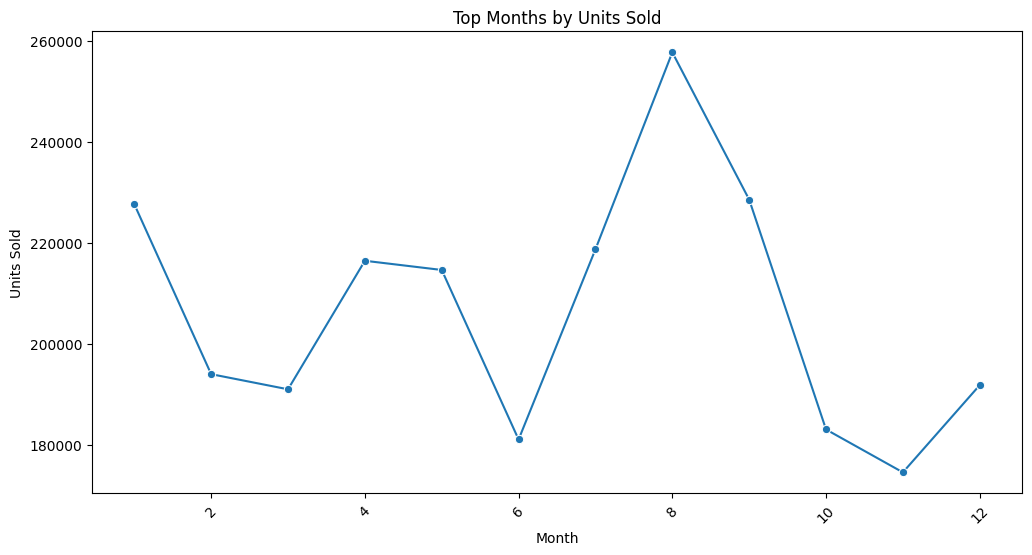

In [75]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Units Sold', data=Top_Months_by_Units_Sold, marker='o')
plt.xticks(rotation=45)
plt.title('Top Months by Units Sold')
plt.xlabel('Month')
plt.ylabel('Units Sold')
plt.show()

## Operating Profit

Top Retailers by Operating Profit

In [76]:
Top_Retailers_by_Operating_Profit = df.groupby('Retailer')['Operating Profit'].sum().reset_index().sort_values(by='Operating Profit', ascending=False)

In [77]:
fig = go.Figure(data=[go.Pie(
    labels=Top_Retailers_by_Operating_Profit['Retailer'],
    values=Top_Retailers_by_Operating_Profit['Operating Profit'],
    hole=0.3,  # For a donut chart effect, adjust if needed
    textinfo='label+percent',  # To show both labels and percentages
    insidetextorientation='radial',  # Orientation of text inside the chart
    rotation=140  # Rotation angle
)])

# Update layout for title
fig.update_layout(
    title_text='Top Retailers by Operating Profit',
    annotations=[dict(text='Operating Profit', x=0.5, y=0.5, font_size=20, showarrow=False)]
)

# Show the figure
fig.show()

Top Products by Operating Profit

In [78]:
Top_Products_by_Operating_Profit = df.groupby('Product')['Operating Profit'].sum().reset_index().sort_values(by='Operating Profit', ascending=False)

In [79]:
fig = go.Figure(data=[go.Pie(
    labels=Top_Products_by_Operating_Profit['Product'],
    values=Top_Products_by_Operating_Profit['Operating Profit'],
    hole=0.3,  # For a donut chart effect, adjust if needed
    textinfo='label+percent',  # To show both labels and percentages
    insidetextorientation='radial',  # Orientation of text inside the chart
    rotation=140  # Rotation angle
)])

# Update layout for title
fig.update_layout(
    title_text='Top Products by Operating Profit',
    annotations=[dict(text='Operating Profit', x=0.5, y=0.5, font_size=20, showarrow=False)]
)

# Show the figure
fig.show()

Top Regions by Operating Profit

In [80]:
Top_Regions_by_Operating_Profit = df.groupby('Region')['Operating Profit'].sum().reset_index().sort_values(by='Operating Profit', ascending=False)

In [81]:
fig = go.Figure(data=[go.Pie(
    labels=Top_Regions_by_Operating_Profit['Region'],
    values=Top_Regions_by_Operating_Profit['Operating Profit'],
    hole=0.3,  # For a donut chart effect, adjust if needed
    textinfo='label+percent',  # To show both labels and percentages
    insidetextorientation='radial',  # Orientation of text inside the chart
    rotation=140  # Rotation angle
)])

# Update layout for title
fig.update_layout(
    title_text='Top Regions by Operating Profit',
    annotations=[dict(text='Operating Profit', x=0.5, y=0.5, font_size=20, showarrow=False)]
)

# Show the figure
fig.show()

Top Sales Method by Operating Profit

In [82]:
Top_Sales_Method_by_Operating_Profit = df.groupby('Sales Method')['Operating Profit'].sum().reset_index().sort_values(by='Operating Profit', ascending=False)

In [83]:
fig = go.Figure(data=[go.Pie(
    labels=Top_Sales_Method_by_Operating_Profit['Sales Method'],
    values=Top_Sales_Method_by_Operating_Profit['Operating Profit'],
    hole=0.3,  # For a donut chart effect, adjust if needed
    textinfo='label+percent',  # To show both labels and percentages
    insidetextorientation='radial',  # Orientation of text inside the chart
    rotation=140  # Rotation angle
)])

# Update layout for title
fig.update_layout(
    title_text='Top Sales Method by Operating Profit',
    annotations=[dict(text='Operating Profit', x=0.5, y=0.5, font_size=20, showarrow=False)]
)

# Show the figure
fig.show()

Top 10 Cities by Operating Profit

In [84]:
Top_10_Cities_by_Operating_Profit = df.groupby('City')['Operating Profit'].sum().reset_index().sort_values(by='Operating Profit',
                                                                   ascending=False).head(10)


In [85]:
fig = go.Figure(data=[go.Bar(
    x=Top_10_Cities_by_Operating_Profit['City'],
    y=Top_10_Cities_by_Operating_Profit['Operating Profit'],
    marker=dict(color=Top_10_Cities_by_Operating_Profit['Operating Profit'], colorscale='Viridis')  # Use a colormap
)])

# Update layout for title and axes
fig.update_layout(
    title='Top 10 Cities by Operating Profit',
    xaxis_title='City',
    yaxis_title='Operating Profit',
    xaxis_tickangle=-45  # Rotate x-axis labels
)

# Show the figure
fig.show()

Top 10 States by Operating Profit

In [86]:
Top_10_States_by_Operating_Profit = df.groupby('State')['Operating Profit'].sum().reset_index().sort_values(by='Operating Profit',
                                                                   ascending=False).head(10)


In [87]:
fig = go.Figure(data=[go.Bar(
    x=Top_10_States_by_Operating_Profit['State'],
    y=Top_10_States_by_Operating_Profit['Operating Profit'],
    marker=dict(color=Top_10_States_by_Operating_Profit['Operating Profit'], colorscale='Viridis')  # Use a colormap
)])

# Update layout for title and axes
fig.update_layout(
    title='Top 10 States by Operating Profit',
    xaxis_title='State',
    yaxis_title='Operating Profit',
    xaxis_tickangle=-45  # Rotate x-axis labels
)

# Show the figure
fig.show()

Top Year by Operating Profit

In [88]:
Top_Year_by_Operating_Profit = df.groupby('Year')['Operating Profit'].sum().reset_index().sort_values(by='Operating Profit', ascending=False)

In [89]:
fig = go.Figure(data=[go.Bar(
    x=Top_Year_by_Operating_Profit['Year'],
    y=Top_Year_by_Operating_Profit['Operating Profit'],
    marker=dict(color=Top_Year_by_Operating_Profit['Operating Profit'], colorscale='Viridis')  # Use a colormap
)])

# Update layout for title and axes
fig.update_layout(
    title='Top Years by Operating Profit',
    xaxis_title='Year',
    yaxis_title='Operating Profit',
    xaxis_tickangle=-45,  # Rotate x-axis labels
    width=800,  # Set figure width
    height=400  # Set figure height
)

# Show the figure
fig.show()

Top Months by Operating Profit

In [90]:
Top_Months_by_Operating_Profit = df.groupby('Month')['Operating Profit'].sum().reset_index().sort_values(by='Operating Profit', ascending=False)

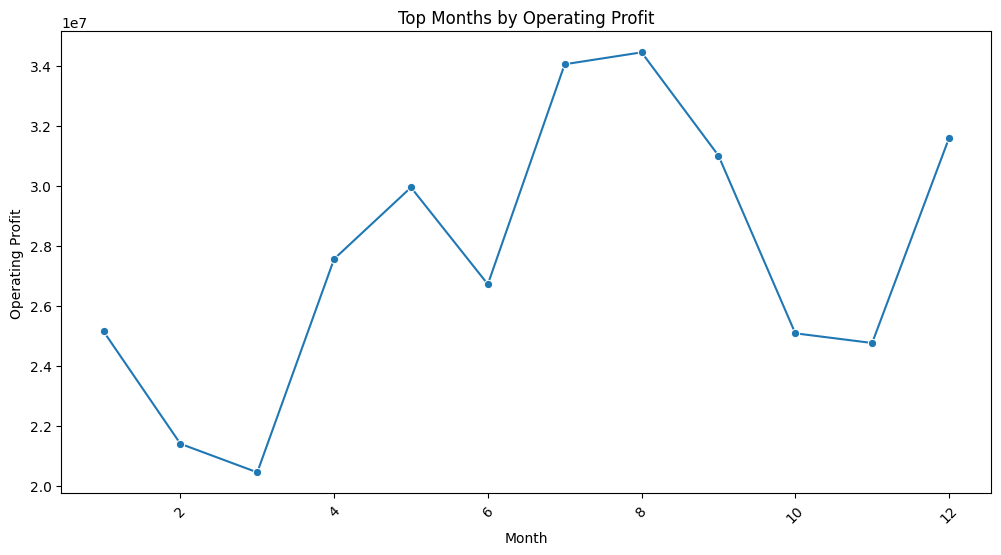

In [91]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Operating Profit', data=Top_Months_by_Operating_Profit, marker='o')
plt.xticks(rotation=45)
plt.title('Top Months by Operating Profit')
plt.xlabel('Month')
plt.ylabel('Operating Profit')
plt.show()

## Operating Margin

Top Retailers by Operating Margin

In [92]:
Top_Retailers_by_Operating_Margin = df.groupby('Retailer')['Operating Margin'].sum().reset_index().sort_values(by='Operating Margin', ascending=False)

In [93]:
fig = go.Figure(data=[go.Pie(
    labels=Top_Retailers_by_Operating_Margin['Retailer'],
    values=Top_Retailers_by_Operating_Margin['Operating Margin'],
    hole=.3,  # This creates a donut chart, remove if you want a full pie chart
    hoverinfo='label+percent',  # Show label and percentage on hover
    textinfo='percent',  # Show percentage on the chart
    textfont_size=12,  # Font size of the text on the chart
    marker=dict(colors=px.colors.qualitative.Pastel)  # Set the color scale
)])

# Update layout for title
fig.update_layout(
    title_text='Top Retailers by Operating Margin',
    annotations=[dict(text='Operating Margin', x=0.5, y=0.5, font_size=20, showarrow=False)]
)

# Show the figure
fig.show()

Top Products by Operating Margin

In [94]:
Top_Products_by_Operating_Margin = df.groupby('Product')['Operating Margin'].sum().reset_index().sort_values(by='Operating Margin', ascending=False)

In [95]:
fig = go.Figure(data=[go.Pie(
    labels=Top_Products_by_Operating_Margin['Product'],
    values=Top_Products_by_Operating_Margin['Operating Margin'],
    hole=.3,  # This creates a donut chart, remove if you want a full pie chart
    hoverinfo='label+percent',  # Show label and percentage on hover
    textinfo='percent',  # Show percentage on the chart
    textfont_size=12,  # Font size of the text on the chart
    marker=dict(colors=px.colors.qualitative.Pastel)  # Set the color scale
)])

# Update layout for title
fig.update_layout(
    title_text='Top Products by Operating Margin',
    annotations=[dict(text='Operating Margin', x=0.5, y=0.5, font_size=20, showarrow=False)]
)

# Show the figure
fig.show()

Top Regions by Operating Margin

In [96]:
Top_Regions_by_Operating_Margin = df.groupby('Region')['Operating Margin'].sum().reset_index().sort_values(by='Operating Margin', ascending=False)

In [97]:
fig = go.Figure(data=[go.Pie(
    labels=Top_Regions_by_Operating_Margin['Region'],
    values=Top_Regions_by_Operating_Margin['Operating Margin'],
    hole=.3,  # This creates a donut chart, remove if you want a full pie chart
    hoverinfo='label+percent',  # Show label and percentage on hover
    textinfo='percent',  # Show percentage on the chart
    textfont_size=12,  # Font size of the text on the chart
    marker=dict(colors=px.colors.qualitative.Pastel)  # Set the color scale
)])

# Update layout for title
fig.update_layout(
    title_text='Top Regions by Operating Margin',
    annotations=[dict(text='Operating Margin', x=0.5, y=0.5, font_size=20, showarrow=False)]
)

# Show the figure
fig.show()

Top Sales Method for Operating Margin

In [98]:
Top_Sales_Methods_by_Operating_Margin = df.groupby('Sales Method')['Operating Margin'].sum().reset_index().sort_values(by='Operating Margin', ascending=False)

In [99]:
fig = go.Figure(data=[go.Pie(
    labels=Top_Sales_Methods_by_Operating_Margin['Sales Method'],
    values=Top_Sales_Methods_by_Operating_Margin['Operating Margin'],
    hole=.3,  # This creates a donut chart, remove if you want a full pie chart
    hoverinfo='label+percent',  # Show label and percentage on hover
    textinfo='percent',  # Show percentage on the chart
    textfont_size=12,  # Font size of the text on the chart
    marker=dict(colors=px.colors.qualitative.Pastel)  # Set the color scale
)])

# Update layout for title
fig.update_layout(
    title_text='Top Sales Methods by Operating Margin',
    annotations=[dict(text='Operating Margin', x=0.5, y=0.5, font_size=20, showarrow=False)]
)

# Show the figure
fig.show()

Top 10 Cities for Operating Margin

In [100]:
Top_10_Cities_by_Operating_Margin = df.groupby('City')['Operating Margin'].sum().reset_index().sort_values(by='Operating Margin',
                                                                   ascending=False).head(10)


In [101]:
fig = go.Figure(data=[go.Bar(
    x=Top_10_Cities_by_Operating_Margin['City'],
    y=Top_10_Cities_by_Operating_Margin['Operating Margin'],
    marker=dict(color=Top_10_Cities_by_Operating_Margin['Operating Margin'], colorscale='Viridis')  # Use a colormap
)])

# Update layout for title and axes
fig.update_layout(
    title='Top 10 Cities by Operating Margin',
    xaxis_title='City',
    yaxis_title='Operating Margin',
    xaxis_tickangle=-45  # Rotate x-axis labels
)

# Show the figure
fig.show()

Top 10 States by Operating Margin

In [102]:
Top_10_States_by_Operating_Margin = df.groupby('State')['Operating Margin'].sum().reset_index().sort_values(by='Operating Margin',
                                                                   ascending=False).head(10)


In [103]:
fig = go.Figure(data=[go.Bar(
    x=Top_10_States_by_Operating_Margin['State'],
    y=Top_10_States_by_Operating_Margin['Operating Margin'],
    marker=dict(color=Top_10_States_by_Operating_Margin['Operating Margin'], colorscale='Viridis')  # Use a colormap
)])

# Update layout for title and axes
fig.update_layout(
    title='Top 10 States by Operating Margin',
    xaxis_title='State',
    yaxis_title='Operating Margin',
    xaxis_tickangle=-45  # Rotate x-axis labels
)

# Show the figure
fig.show()

Top Year by Operating Margin

In [104]:
Top_Year_by_Operating_Margin = df.groupby('Year')['Operating Margin'].sum().reset_index().sort_values(by='Operating Margin', ascending=False)

In [105]:
fig = go.Figure(data=[go.Bar(
    x=Top_Year_by_Operating_Margin['Year'],
    y=Top_Year_by_Operating_Margin['Operating Margin'],
    marker=dict(color=Top_Year_by_Operating_Margin['Operating Margin'], colorscale='Viridis')  # Use a colormap
)])

# Update layout for title and axes
fig.update_layout(
    title='Top Years by Operating Margin',
    xaxis_title='Year',
    yaxis_title='Operating Margin',
    xaxis_tickangle=-45,  # Rotate x-axis labels
    width=800,  # Set figure width
    height=400  # Set figure height
)

# Show the figure
fig.show()

Top Months by Operating Margin

In [106]:
Top_Months_by_Operating_Margin = df.groupby('Month')['Operating Margin'].sum().reset_index().sort_values(by='Operating Margin', ascending=False)

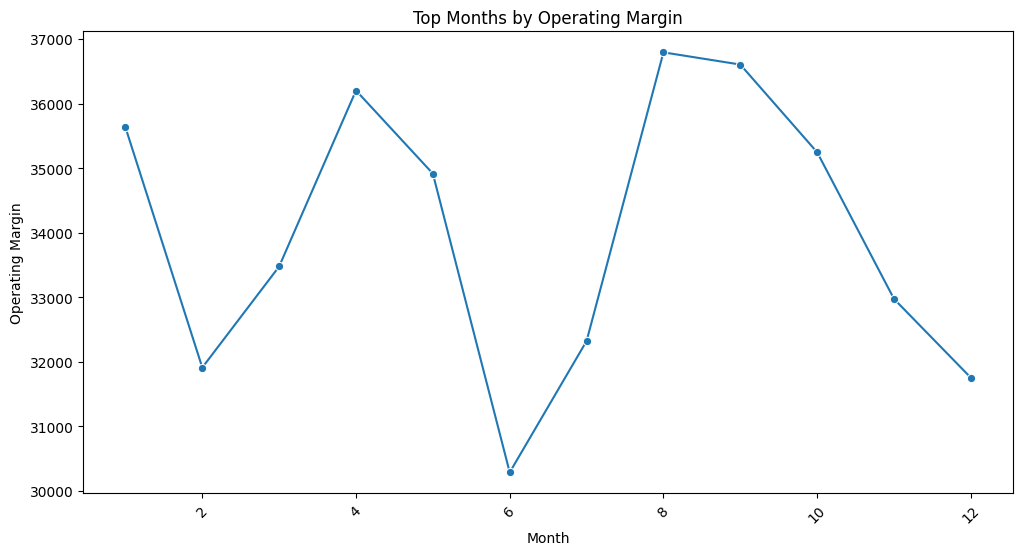

In [107]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Operating Margin', data=Top_Months_by_Operating_Margin, marker='o')
plt.xticks(rotation=45)
plt.title('Top Months by Operating Margin')
plt.show()

Minimum , Maximum , Average Price/Unit of each Product

In [108]:
df.groupby('Product')['Price per Unit'].agg(['min', 'max', 'mean']).reset_index()

,Product,min,max,mean
0,Men's Apparel,16,95,50
1,Men's Athletic Footwear,11,95,44
2,Men's Street Footwear,7,95,44
3,Women's Apparel,14,110,52
4,Women's Athletic Footwear,7,90,41
5,Women's Street Footwear,7,95,40


Minimum , Maximum , Average Price/Unit of each Product acording to Retailers

In [109]:
df.groupby(['Product', 'Retailer'])['Price per Unit'].agg(['min', 'max', 'mean']).reset_index()

,Product,Retailer,min,max,mean
0,Men's Apparel,Amazon,32,80,55
1,Men's Apparel,Foot Locker,23,90,51
2,Men's Apparel,Kohl's,24,75,49
3,Men's Apparel,Sports Direct,19,90,47
4,Men's Apparel,Walmart,18,95,49
5,Men's Apparel,West Gear,16,95,52
6,Men's Athletic Footwear,Amazon,24,65,47
7,Men's Athletic Footwear,Foot Locker,14,90,43
8,Men's Athletic Footwear,Kohl's,11,65,43
9,Men's Athletic Footwear,Sports Direct,14,60,40


In [110]:
df.groupby(['Product', 'Region'])['Price per Unit'].agg(['min', 'max', 'mean']).reset_index()

,Product,Region,min,max,mean
0,Men's Apparel,Midwest,23,80,47
1,Men's Apparel,Northeast,32,75,52
2,Men's Apparel,South,18,95,43
3,Men's Apparel,Southeast,29,95,55
4,Men's Apparel,West,16,90,53
5,Men's Athletic Footwear,Midwest,14,65,38
6,Men's Athletic Footwear,Northeast,23,65,45
7,Men's Athletic Footwear,South,11,95,37
8,Men's Athletic Footwear,Southeast,27,95,49
9,Men's Athletic Footwear,West,14,90,50


In [111]:
df.groupby(['Product', 'Sales Method'])['Price per Unit'].agg(['min', 'max', 'mean']).reset_index()

,Product,Sales Method,min,max,mean
0,Men's Apparel,In-store,20,95,55
1,Men's Apparel,Online,19,95,51
2,Men's Apparel,Outlet,16,90,46
3,Men's Athletic Footwear,In-store,20,95,47
4,Men's Athletic Footwear,Online,14,95,44
5,Men's Athletic Footwear,Outlet,11,85,41
6,Men's Street Footwear,In-store,20,95,49
7,Men's Street Footwear,Online,9,95,45
8,Men's Street Footwear,Outlet,7,85,40
9,Women's Apparel,In-store,15,110,56


In [112]:
df.groupby(['Product', 'City'])['Price per Unit'].agg(['min', 'max', 'mean']).reset_index()

,Product,City,min,max,mean
0,Men's Apparel,Albany,49,65,57
1,Men's Apparel,Albuquerque,34,70,53
2,Men's Apparel,Anchorage,46,75,63
3,Men's Apparel,Atlanta,34,65,50
4,Men's Apparel,Baltimore,41,60,50
5,Men's Apparel,Billings,41,55,49
6,Men's Apparel,Birmingham,19,60,40
7,Men's Apparel,Boise,25,55,43
8,Men's Apparel,Boston,33,65,50
9,Men's Apparel,Burlington,36,70,54


In [113]:
df.groupby(['Product', 'State'])['Price per Unit'].agg(['min', 'max', 'mean']).reset_index()

,Product,State,min,max,mean
0,Men's Apparel,Alabama,19,60,40
1,Men's Apparel,Alaska,46,75,63
2,Men's Apparel,Arizona,33,65,49
3,Men's Apparel,Arkansas,18,75,41
4,Men's Apparel,California,36,75,53
5,Men's Apparel,Colorado,41,75,64
6,Men's Apparel,Connecticut,34,65,49
7,Men's Apparel,Delaware,41,65,53
8,Men's Apparel,Florida,36,95,62
9,Men's Apparel,Georgia,34,65,50


In [114]:
df.groupby(['Product', 'Year'])['Price per Unit'].agg(['min', 'max', 'mean']).reset_index()

,Product,Year,min,max,mean
0,Men's Apparel,2020,26,90,55
1,Men's Apparel,2021,16,95,50
2,Men's Athletic Footwear,2020,23,85,50
3,Men's Athletic Footwear,2021,11,95,43
4,Men's Street Footwear,2020,20,85,48
5,Men's Street Footwear,2021,7,95,44
6,Women's Apparel,2020,25,100,57
7,Women's Apparel,2021,14,110,51
8,Women's Athletic Footwear,2020,24,80,47
9,Women's Athletic Footwear,2021,7,90,40


In [115]:
df.groupby(['Product', 'Month'])['Price per Unit'].agg(['min', 'max', 'mean']).reset_index()

,Product,Month,min,max,mean
0,Men's Apparel,1,23,75,47
1,Men's Apparel,2,23,75,47
2,Men's Apparel,3,24,70,46
3,Men's Apparel,4,20,75,48
4,Men's Apparel,5,28,75,50
5,Men's Apparel,6,24,95,55
6,Men's Apparel,7,26,95,55
7,Men's Apparel,8,19,90,48
8,Men's Apparel,9,16,75,44
9,Men's Apparel,10,20,75,48


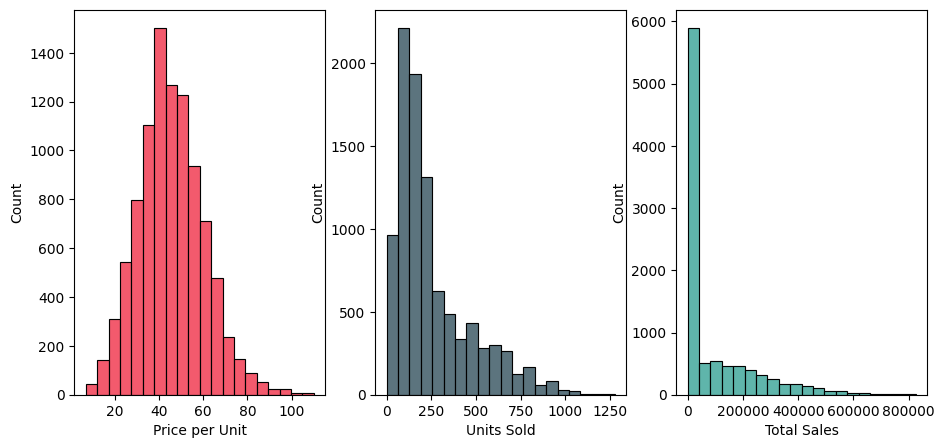

In [116]:
f, ax=plt.subplots(1,3, figsize=(11,5))
sns.histplot(df['Price per Unit'], bins=20, ax=ax[0], color='#ef233c')
sns.histplot(df['Units Sold'], bins=20, ax=ax[1], color='#264653')
sns.histplot(df['Total Sales'], bins=20, ax=ax[2], color='#2a9d8f');